In [1]:
# Import all the libraries

import pandas as pd
import numpy as mp
import graphviz
import seaborn as seabornInstance 
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing




from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import collections
from PIL import Image
from sklearn.tree import export_graphviz 
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from matplotlib import pyplot as plt
import seaborn as sns
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [2]:
# Collecting Dataset

data = pd.read_csv(r"E:\EWU Files\Sem 9\CSE 366 AKD Sir\Project\diabetes.csv")
df = data

In [3]:
# Check 1st 3 rows

data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
# Check for the missing values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Showing columns

features = data.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Feature stores without 'y' value

features = [x for x in features if x != 'Outcome']                                              
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
# Split dataset into test and train

train, test = train_test_split(data, test_size = 0.25)
print(len(data))
print(len(train))
print(len(test))

768
576
192


In [10]:
# Declare Decision Tree

dt= DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')

In [12]:
# Making Train and Test

x_train = train[features]
y_train = train["Outcome"]

x_test = test[features]
y_test = test["Outcome"]

In [13]:
# Fiting into Decision Tree

dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

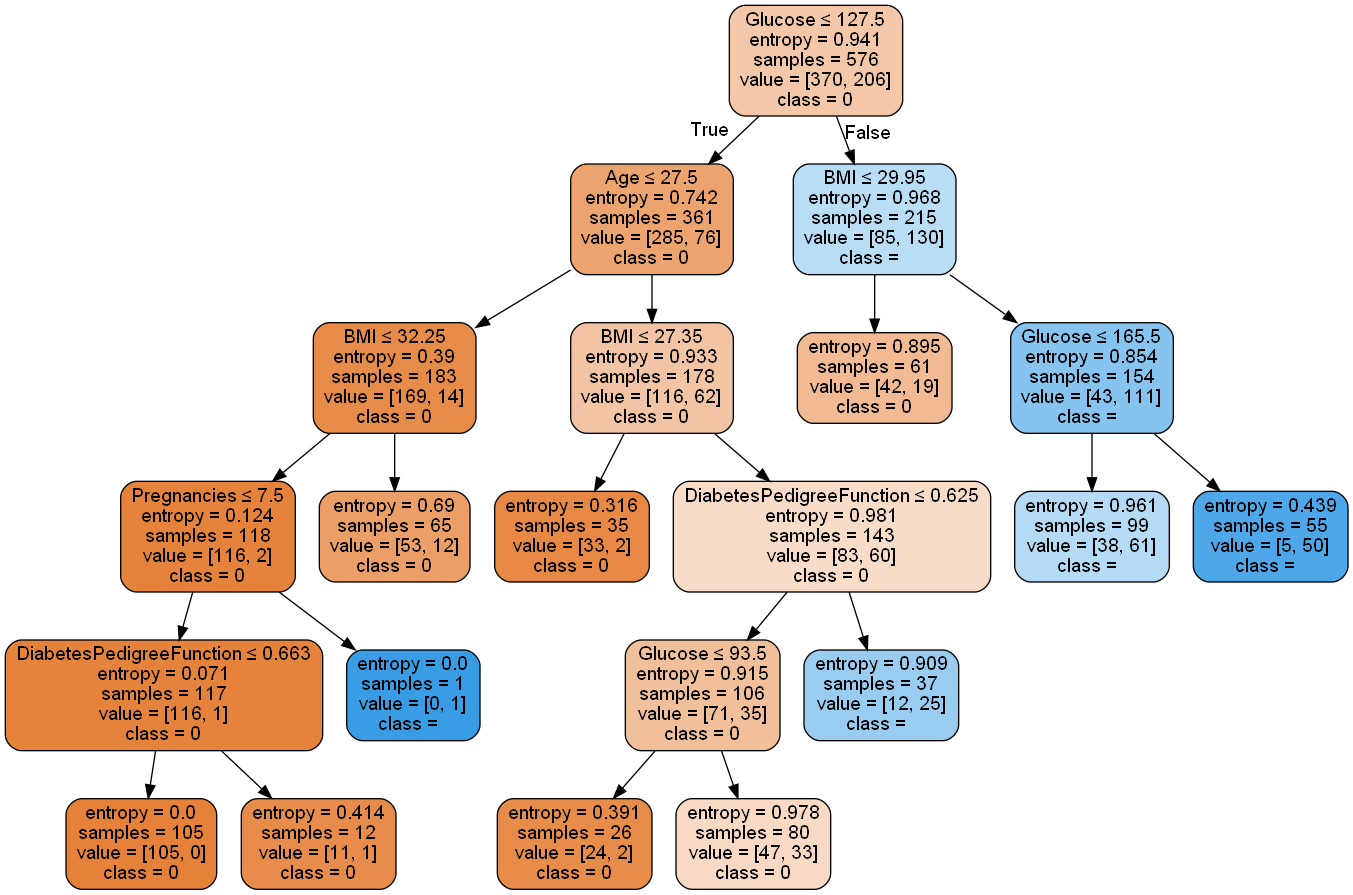

In [14]:
# Show The Tree

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features,  
                     class_names=str(data.Outcome),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
# Calculating Accuracy

p_score = precision_score(y_test, y_pred) * 100
score = accuracy_score(y_test, y_pred) * 100


print('Precision Score of desicion tree: ', round(p_score, 1), "%")
print("Accuracy using desicion Tree: ", round(score, 1), "%" )


Precision Score:  68.3 %
Accuracy using desicion Tree:  79.7 %


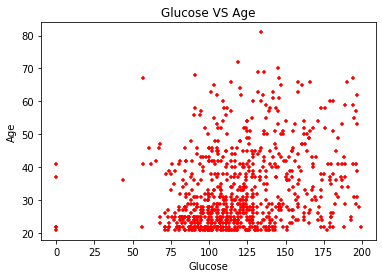

In [17]:
# Plotting 1

data.plot(kind="scatter", x="Glucose", y= "Age", color='red', marker='+') 
plt.title('Glucose VS Age')  
plt.xlabel('Glucose')  
plt.ylabel('Age')  
plt.show()

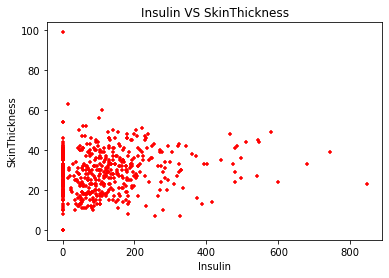

In [18]:
# Plotting 2

data.plot(kind="scatter", x="Insulin", y= "SkinThickness", color='red', marker='+') 
plt.title('Insulin VS SkinThickness')  
plt.xlabel('Insulin')  
plt.ylabel('SkinThickness')  
plt.show()

In [19]:
# Fiting into Naive Bayes

Nb=GaussianNB()
Nb= Nb.fit(x_train,y_train)

y_pred=Nb.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [20]:
# Calculating Accuracy

p_score = precision_score(y_test, y_pred) * 100
score = accuracy_score(y_test, y_pred) * 100

print('Precision Score Naive Bayes: ', round(p_score, 1), "%")
print("Accuracy using Naive Bayes: ", round(score, 1), "%" )

Precision Score:  67.2 %
Accuracy using desicion Tree:  78.1 %


In [21]:
# Fiting into K-Nearest Neighbors

KN = KNeighborsClassifier(n_neighbors=3)
KN = KN.fit(x_train, y_train)
y_pred = KN.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
# Calculating Accuracy

p_score = precision_score(y_test, y_pred) * 100
score = accuracy_score(y_test, y_pred) * 100

print('Precision Score KNN: ', round(p_score, 1), "%")
print("Accuracy using KNN: ", round(score, 1), "%" )

Precision Score:  57.1 %
Accuracy using desicion Tree:  72.9 %


In [24]:
# Fiting into Random Forest

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [25]:
# Calculating Accuracy

p_score = precision_score(y_test, y_pred) * 100
score = accuracy_score(y_test, y_pred) * 100

print('Precision Score Random Forest: ', round(p_score, 1), "%")
print("Accuracy using Random Forest: ", round(score, 1), "%" )

Precision Score:  75.8 %
Accuracy using desicion Tree:  76.6 %
